# Задача**:**

Помогите «Нупозвони» найти самых неэффективных операторов. Признаки низкой эффективности:

- много пропущенных входящих вызовов,
- долгое ожидания ответа при входящих внешних вызовах,
- мало исходящих вывозов — в случае тех колл-центров, что специализируются на обзвонах, а не обработке входящих звонков.  

**Шаг 1. Откройте файл с данными и изучите общую информацию**  
*Датасеты*

[telecom_clients.csv](https://disk.yandex.ru/d/qDyw04TLVP4CiA)

[telecom_dataset.csv](https://disk.yandex.ru/d/Z6Q6KHy2I_WwCA)    

**Шаг 2. Произвести предобработку данных**   

Этапы будут дублироваться на обе бд.
- соответствие типов данных 
- проверка на пропущенные значения
- проверка на дубликаты
- объеденим бд
  
  
**Шаг 3.Проведите исследовательский анализ данных.**  

- Произведем категатеризацию(на "принимающие" те колл центры, которые занимаются приемом звонков и "обзванивающие", которые исходящими звонками) данных с определением  кол-во колл центров и их кол-во операторов. 

Для каждой категории определим неэффективных операторов.  
  - Оценим по Average Wait Time
  - Сколько пропущенныех звонков имеют операторы из "принимающих"?

Признаки низкой эффективности:
  - много пропущенных входящих вызовов. Составим гистограмму разброса, на ее основании и установим рамки эффективности. 
  - долгое ожидания ответа при входящих внешних вызовах. На гисторграмме разброса увидим и установим рамки эффективности.
  - мало исходящих вывозов — в случае тех колл-центров, что специализируются на обзвонах, а не обработке входящих звонков. На гисторграмме разброса увидим и установим рамки эффективности.  
  


**Шаг 4.Проверьте статистические гипотезы.**  
- Проверка гипотезы о различии времени ожидания ответа на входящий звонок в зависимости от тарифного плана  
- Проверка гипотезы о различии числа пропущенных входящих вызовов в зависимости от тарифного плана  




**Шаг 5. Построить дашборд и презентацию в pdf**  

- Постройте диаграмму количества вызовов по дням;  
- Постройте круговую диаграмму, отображающую соотношение кол-ва входящих и исходящих вызовов;
- Добавьте фильтр дашборда по типу вызова (внешний или внутренний)

Задачи проекта:   
	- провести исследовательский анализ данных и предложить возможные критерии неэффективности операторов;  
	- получить список неэффективных операторов;  
	- посмотреть у каких клиентов есть проблемы с эффективностью операторов;  
	- на сколько мы можем помочь клиентам увеличить эффективность операторов;  
	- предложить пути решения проблемы неэффективности: методы регулярного выявления неэффективных операторов и общего повышения эффективности работы;  
	Важно формализовать критерии и методы анализа, т.к. планируется автоматизировать этот функционал  
    . 


# **Описание данных:**

Датасеты описывают использование услуг «Нупозвони» — провайдера виртуальный телефонии. Его клиенты — колл-центры, которые: 

- распределяют входящие вызовы на операторов,
- совершают исходящие вызовы силами операторов.

Также операторы могут делать внутренние вызовы —  вызовы друг между другом внутри сети виртуальной телефонии.

Колонки в `telecom_dataset.csv.zip`:

- `user_id` — Идентификатор клиентского аккаунта в сервисе
- `date` — Дата статистики
- `direction` — Направление вызовов (out - исходящий вызов, in — входящий вызов)
- `internal` — Является ли звонок внутренним звонком между операторами клиента
- `operator_id` — Идентификатор оператора
- `is_missed_call` — Является ли звонок пропущенным
- `calls_count` — Количество звонков
- `call_duration` — Длительность звонка (без учета времени ожидания)
- `total_call_duration` — Длительность звонка (с учетом времени ожидания)

Колонки в `telecom_clients.csv`:

- `user_id` — Идентификатор клиентского аккаунта в сервисе
- `tariff_plan` — Текущий тарифный план клиента
- `date_start` — Дата регистрации клиентв в сервисе

# Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import scipy.stats as st
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from plotly import graph_objects as go
import plotly.express as px
sns.set(rc={'figure.figsize':(15, 10)})
import math as mth
import datetime

In [2]:
clients = pd.read_csv('https://code.s3.yandex.net/datasets/telecom_clients.csv')

In [3]:
df_df = pd.read_csv('https://code.s3.yandex.net/datasets/telecom_dataset.csv')

In [4]:
df_df.info()
df_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


(53902, 9)

In [5]:
df_df.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


In [6]:
clients.info()
clients.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


(732, 3)

In [7]:
clients.head()

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


Так, по бд "df_df" - видим пропуски, нелбходимо посмотреть из-за чего и чем можно заполнить, вохзможно удалить. "date"-изменить тип данных на дату.  
По "clients", никаких проблем нет, изменить только тип данных в "date_start". 

# Шаг 2. Произвести предобработку данных

In [8]:
#можно объеденить табилцу для удобства
df = df_df.merge(clients, on = 'user_id')

In [9]:
#проверим кол-во дубликатов
print('Количество дубликатов:', df.duplicated().sum())

Количество дубликатов: 4900


In [10]:
#удалить
df = df.drop_duplicates()
df.duplicated().sum()

0

In [11]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49002 entries, 0 to 53901
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              49002 non-null  int64  
 1   date                 49002 non-null  object 
 2   direction            49002 non-null  object 
 3   internal             48892 non-null  object 
 4   operator_id          41546 non-null  float64
 5   is_missed_call       49002 non-null  bool   
 6   calls_count          49002 non-null  int64  
 7   call_duration        49002 non-null  int64  
 8   total_call_duration  49002 non-null  int64  
 9   tariff_plan          49002 non-null  object 
 10  date_start           49002 non-null  object 
dtypes: bool(1), float64(1), int64(4), object(5)
memory usage: 4.2+ MB


Интересно, есть еще пропуски в "operator_id", посмотрим          

In [12]:
# проверим количество пропусков
print('Количество пропусков:')
df.isna().sum()

Количество пропусков:


user_id                   0
date                      0
direction                 0
internal                110
operator_id            7456
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
tariff_plan               0
date_start                0
dtype: int64

In [13]:
#посмотрим процент пропусков от общего кол-ва данных
pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
user_id,0.000000
date,0.000000
direction,0.000000
internal,0.220000
operator_id,15.220000
is_missed_call,0.000000
calls_count,0.000000
call_duration,0.000000
total_call_duration,0.000000
tariff_plan,0.000000


картина складывается не очень, необходимо заполнить 15.22% данных в "operator_id", но так как мы оцениваем в операторов прийдеися удалить значения. А вот в "internal" удалим.

In [14]:
#удаляем
df = df.dropna(subset = ['internal'])

In [15]:
#удаляем
df = df.dropna(subset = ['operator_id'])

In [16]:
df.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5,B,2019-08-01
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1,B,2019-08-01
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18,B,2019-08-01
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25,B,2019-08-01
5,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,False,2,3,29,B,2019-08-01


In [17]:
#меняем тип
df['date'] = pd.to_datetime(df['date'])

In [18]:
#меняем тип
df['date_start'] = pd.to_datetime(df['date_start'])

In [19]:
df.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5,B,2019-08-01
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1,B,2019-08-01
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18,B,2019-08-01
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25,B,2019-08-01
5,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,False,2,3,29,B,2019-08-01


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41491 entries, 1 to 53899
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   user_id              41491 non-null  int64                                
 1   date                 41491 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   direction            41491 non-null  object                               
 3   internal             41491 non-null  object                               
 4   operator_id          41491 non-null  float64                              
 5   is_missed_call       41491 non-null  bool                                 
 6   calls_count          41491 non-null  int64                                
 7   call_duration        41491 non-null  int64                                
 8   total_call_duration  41491 non-null  int64                                
 9   tariff

C обработкой типов данных, пропусков и дубликатов законченно, проверим аномалии и выбросы, если такие есть.

In [21]:
[df[col].describe() for col in df.columns if df[col].dtype in ['float','int64']]

[count     41491.000000
 mean     167301.113543
 std         600.513986
 min      166377.000000
 25%      166782.000000
 50%      167175.000000
 75%      167827.000000
 max      168606.000000
 Name: user_id, dtype: float64,
 count     41491.000000
 mean     916516.771155
 std       21234.081589
 min      879896.000000
 25%      900790.000000
 50%      913938.000000
 75%      937708.000000
 max      973286.000000
 Name: operator_id, dtype: float64,
 count    41491.000000
 mean        16.921381
 std         59.786187
 min          1.000000
 25%          1.000000
 50%          4.000000
 75%         14.000000
 max       4817.000000
 Name: calls_count, dtype: float64,
 count     41491.000000
 mean       1010.940011
 std        4066.666485
 min           0.000000
 25%           0.000000
 50%         106.000000
 75%         772.000000
 max      144395.000000
 Name: call_duration, dtype: float64,
 count     41491.000000
 mean       1323.153238
 std        4788.953155
 min           0.000000
 2

Большие выбросы в кол-ве звонков, звонках без ожидания и в общей длительность звонка. 

In [22]:
#проверим возьмем срез за 12 часов день
df_1 = df.query('call_duration > 43200')

In [23]:
df_1['user_id'].value_counts()

166582    96
Name: user_id, dtype: int64

In [24]:
def mybox(df,title):
    q75, q25 = np.percentile(df, [75,25])
    iqr = q75 - q25
    min = q25 - (q25 +1.5*iqr)
    max = q75 + 1.5*iqr
    print('Граница нижнего уса: ', min)
    print('Граница верхнего уса: ', max)
    print(df.describe())
    fig = plt.figure(figsize =(10, 7)) 
    plt.ylim(0,max*1.2)
    plt.boxplot(df,sym='k+', notch=1,)
    plt.title(f'График "ящик с усами"для {title}')
    plt.show()

Граница нижнего уса:  -16.5
Граница верхнего уса:  29.5
count    27660.000000
mean        15.554085
std         49.480135
min          1.000000
25%          2.000000
50%          4.000000
75%         13.000000
max       1480.000000
Name: calls_count, dtype: float64


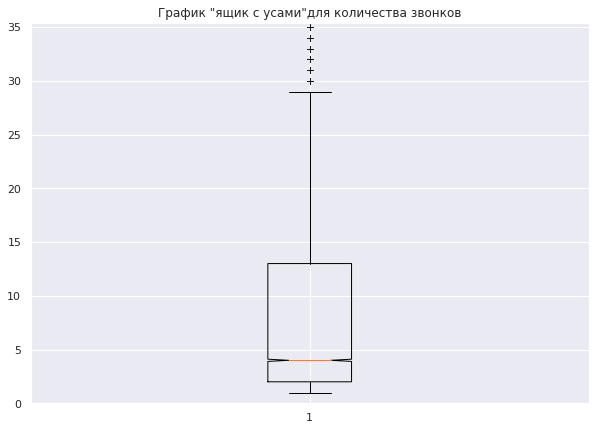

In [25]:
mybox(df.query('call_duration != 0').calls_count, 'количества звонков')

Граница нижнего уса:  -1942.5
Граница верхнего уса:  3343.5
count     27660.000000
mean       1516.446565
std        4903.158159
min           1.000000
25%         106.000000
50%         435.000000
75%        1401.000000
max      144395.000000
Name: call_duration, dtype: float64


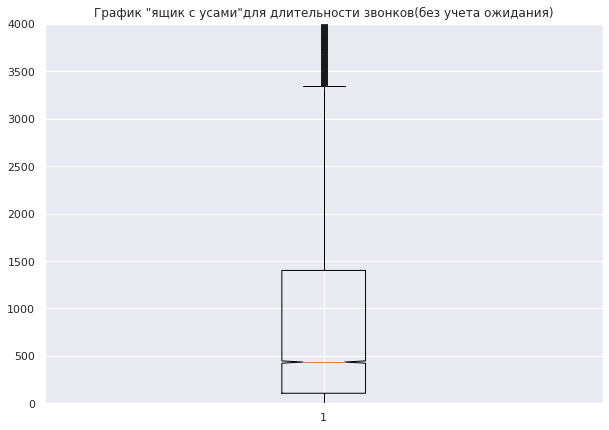

In [26]:
mybox(df.query('call_duration !=0').call_duration, 'длительности звонков(без учета ожидания)')

Граница нижнего уса:  -2232.0
Граница верхнего уса:  3854.0
count     27660.000000
mean       1757.802495
std        5711.431070
min           1.000000
25%         134.000000
50%         502.500000
75%        1622.000000
max      166155.000000
Name: total_call_duration, dtype: float64


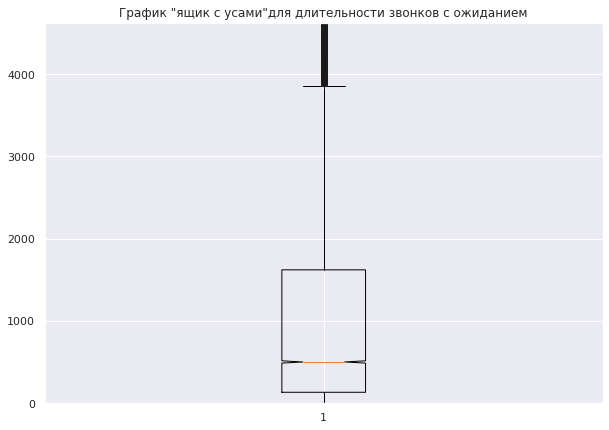

In [27]:
mybox(df.query('call_duration !=0').total_call_duration, 'длительности звонков с ожиданием')

In [28]:
df = df.query('call_duration <= 43200')

**Вывод**  
мы обработали все данные, удалили дубликаты и заполнили пропуски значениями из user_id на 0.52, т.к. их кол-во было существенным и могло повлиять на наш итоговый результат. Произвели замену типов данных в датах, заметили и избавились от выбросов.За основу взяли 12 часовой день, конечно тоже мало вероятно, но не будет исключать такой возможности, что у нас есть фанат своей работы. Моё предположение, что это бот, который обзванивает номера, которые когда-либо не взли трубку или были в недоступа. 

# Шаг 3.Проведите исследовательский анализ данных.

Проведем категаризации колл центров. in - только входящие, out - только исходящии и in_out - мульти.

In [29]:
df_dir = df.query('call_duration != 0').pivot_table(index = ['user_id'], columns =['direction'], values = ['calls_count'], aggfunc = (sum)).fillna(0).reset_index()
df_dir.columns = ['user_id', 'in', 'out']

In [30]:
df_dir.head()

,user_id,in,out
0,166377,102.0,3167.0
1,166391,6.0,0.0
2,166392,102.0,0.0
3,166399,11.0,0.0
4,166405,2177.0,6461.0


Граница нижнего уса:  -246.0
Граница верхнего уса:  418.0
count     287.000000
mean      324.790941
std       926.995710
min         0.000000
25%         8.000000
50%        39.000000
75%       172.000000
max      7874.000000
Name: in, dtype: float64


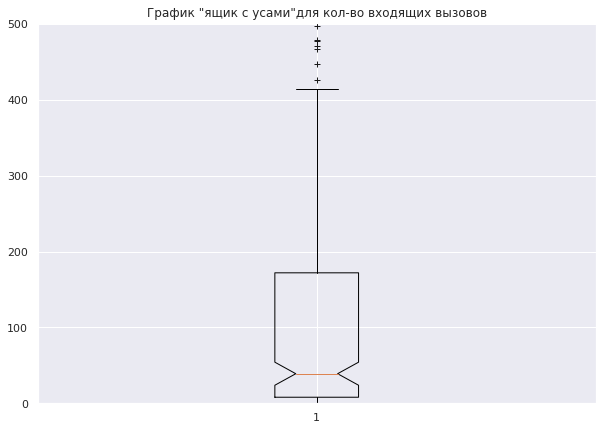

In [31]:
mybox(df_dir['in'], 'кол-во входящих вызовов')

Граница нижнего уса:  -809.25
Граница верхнего уса:  1348.75
count      287.000000
mean       961.470383
std       3500.881017
min          0.000000
25%          0.000000
50%         50.000000
75%        539.500000
max      37261.000000
Name: out, dtype: float64


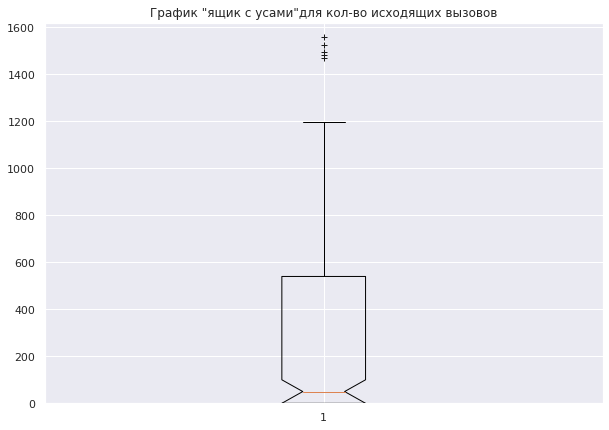

In [32]:
mybox(df_dir['out'], 'кол-во исходящих вызовов')

In [33]:
df_dir['percentile'] = df_dir['in']/(df_dir['in']+df_dir['out'])*100

In [34]:
#Посчитаем процент от общих звонков
df_dir.head()

,user_id,in,out,percentile
0,166377,102.0,3167.0,3.120220
1,166391,6.0,0.0,100.000000
2,166392,102.0,0.0,100.000000
3,166399,11.0,0.0,100.000000
4,166405,2177.0,6461.0,25.202593


In [35]:
#присвоим группы для колл-центров
def group_dir(row):
    if (row['in'] !=0) & (row['percentile'] >= 49.99):
        return 'in'
    elif (row['out'] != 0) & (row['percentile'] <= 50.01):
         return 'out'
    else:
        return 'проверить'

In [36]:
df_dir['direction_group'] = df_dir.apply(group_dir, axis =1)
df_dir['direction_group'].value_counts()

in     147
out    140
Name: direction_group, dtype: int64

In [37]:
df_dir_1 = df_dir[['user_id', 'direction_group']]
df_dir_1

,user_id,direction_group
0,166377,out
1,166391,in
2,166392,in
3,166399,in
4,166405,out
...,...,...
282,168583,in
283,168598,in
284,168601,out
285,168603,out


In [38]:
#присоеденим к нашей таблице
df = df.merge(df_dir_1, on = 'user_id')

Для будущих оценок - категаризацию провели, теперь непосредственно метрики.

**Оценим по Среднему ожиданию вызова**

In [39]:
df['avr'] = (df['total_call_duration'] - df['call_duration']) / df['calls_count']

In [40]:
df.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,direction_group,avr
0,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5,B,2019-08-01,out,1.666667
1,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1,B,2019-08-01,out,1.000000
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18,B,2019-08-01,out,8.000000
3,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25,B,2019-08-01,out,8.333333
4,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,False,2,3,29,B,2019-08-01,out,13.000000


Граница нижнего уса:  -15.097115384615389
Граница верхнего уса:  33.16185897435898
count    27564.000000
mean        14.516526
std         10.470982
min          0.000000
25%          8.000000
50%         13.000000
75%         18.064744
max        451.203883
Name: avr, dtype: float64


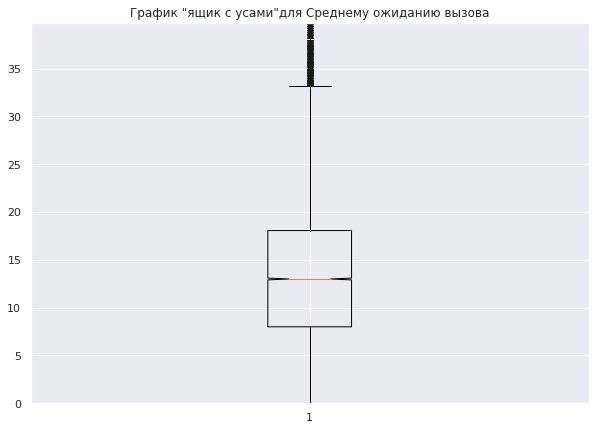

In [41]:
mybox(df.query('call_duration !=0').avr, 'Среднему ожиданию вызова')

Оценка KPI для колл центра и в ней данная метрика обозначенна в 20 секунд. Видим, что данный показатель в основной своей массе у нас подходит. Данная метрика подойдет для колл центров из категории "in" и "in_out".  

Ссылка источника: https://imccenter.ru/kak-izmerit-effektivnost-koll-tsentra/#:~:text=%D0%A1%D1%80%D0%B5%D0%B4%D0%BD%D0%B5%D0%B5%20%D0%B2%D1%80%D0%B5%D0%BC%D1%8F%20%D0%BE%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B8%20%D0%BE%D0%B4%D0%BD%D0%BE%D0%B3%D0%BE%20%D0%B7%D0%B2%D0%BE%D0%BD%D0%BA%D0%B0,%D0%B2%D1%80%D0%B5%D0%BC%D1%8F%20%D0%BF%D0%BE%D1%81%D1%82%D0%BE%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B8%2C%20%D0%B0%20%D1%82%D0%B0%D0%BA%D0%B6%D0%B5%20%D0%BF%D0%B0%D1%83%D0%B7%D1%8B)

**Сколько пропущенныех звонков имеют операторы из "принимающих"?**

Граница нижнего уса:  -6.0
Граница верхнего уса:  11.0
count    1973.000000
mean        6.709579
std        12.321434
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       100.000000
Name: calls_count, dtype: float64


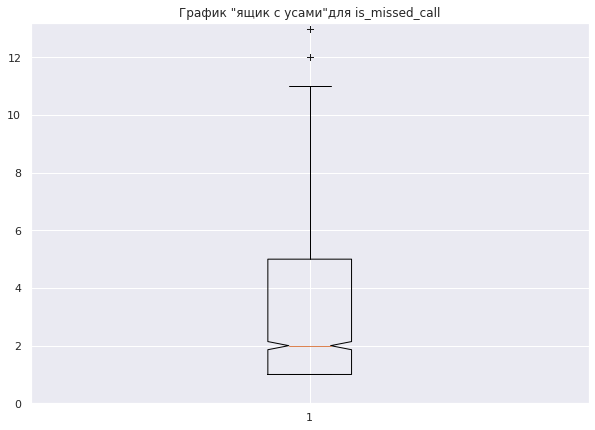

In [42]:
mybox(df.query('direction_group == "in" and is_missed_call == True')['calls_count'], 'is_missed_call')

In [43]:
missed_calls = df[(df['direction_group'] == 'in') & (df['is_missed_call'] == True)]

In [44]:
miss = missed_calls.groupby('user_id', as_index=False).agg({'calls_count':'sum'}).sort_values(by='calls_count', ascending=False)
miss.head(10)

,user_id,calls_count
83,168252,5078
57,167650,2913
50,167466,605
47,167445,460
84,168253,441
86,168271,403
61,167799,390
70,167977,348
25,167071,342
36,167235,327


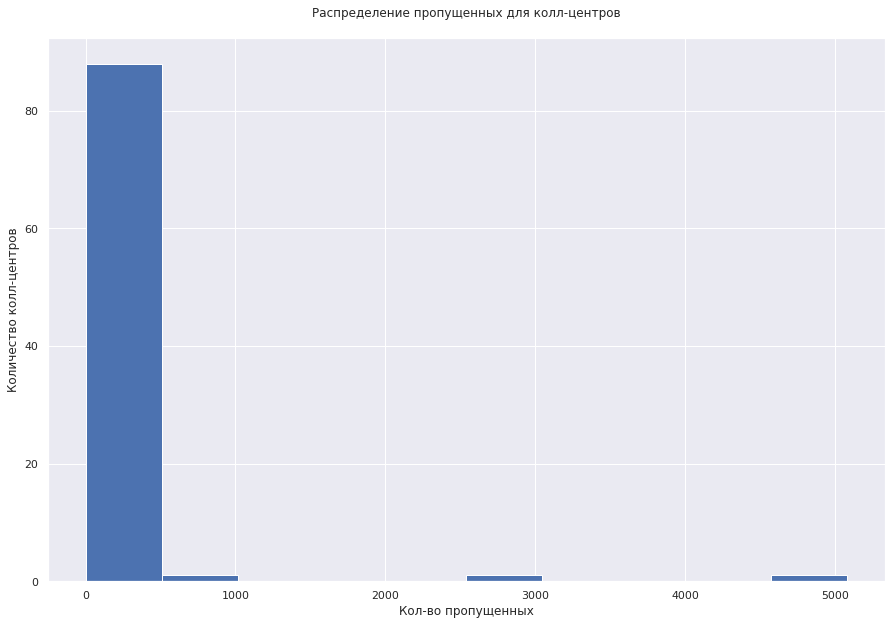

In [45]:
miss['calls_count'].hist()
plt.title('Распределение пропущенных для колл-центров\n')
plt.xlabel('Кол-во пропущенных')
plt.ylabel('Количество колл-центров')
plt.show()

Пропущенные есть у каждого оператора, который специализируется на входящих звонках. Процент пропущенных не должен привышать 5% порог для колл-центров.


Источник:https://zen.yandex.ru/media/id/5d8b259c8d5b5f00aff0a889/chto-takoe-procent-propuscennyh-zvonkov-5f57533b692a906cd066f875

In [46]:
#Добавим столбец для оценки данного показателя
df['miss_limit'] = round(df['calls_count'] * 0.05)

**мало исходящих вывозов — в случае тех колл-центров, что специализируются на обзвонах, а не обработке входящих звонков. На гисторграмме разброса увидим и установим рамки эффективности.** 

Граница нижнего уса:  -19.5
Граница верхнего уса:  34.5
count    20442.000000
mean        14.685598
std         32.324056
min          1.000000
25%          2.000000
50%          5.000000
75%         15.000000
max        970.000000
Name: calls_count, dtype: float64


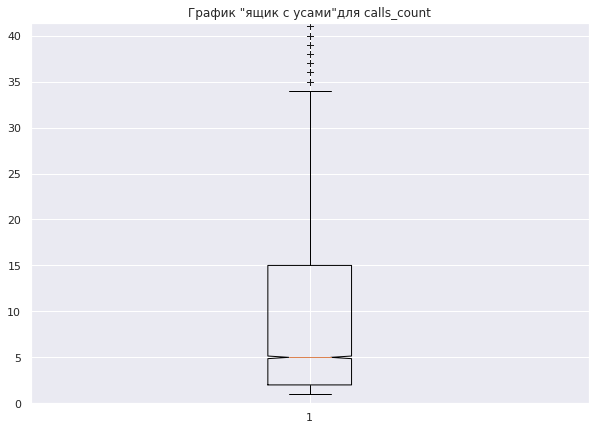

In [47]:
mybox(df.query('direction_group == "out" and is_missed_call == False')['calls_count'], 'calls_count')

Нигде не нашел метрики для оценки исходящих вызовов на основе наших данных, не хватает кол-ва рабочего времени.

Для каждой группы выделили метрики для оценки показателей эффективности колл-центров. Оценять будем по скорингу, для каждой группы.    
Признаки низкой эффективности:
  - много пропущенных входящих вызовов. Оценка будет простой, если кол-во больше кол-ва допустимого лимита, скоринг 1, ниже 0.
  - долгое ожидания ответа при входящих внешних вызовах. Берем информацию из источника выше, максимальный предел 20 сек. Скоринг 0 - 10 = 0, от 11-20 = 0.5, более 20 сек = 1.
  - мало исходящих вывозов — в случае тех колл-центров, что специализируются на обзвонах, а не обработке входящих звонков. На гисторграмме разброса увидим и установим рамки эффективности.  Здесь предлагаю установить лимиты 0-9 = 1 , 10-20 = 0.5 и более 20 = 0. Так же пояснение, что учитывать с пропущенными звонками не будет.

In [48]:
# оценка операторов который специализируется на исходящих обзвонах.
def out_score(row):
    if row['direction'] == "out" and row['is_missed_call'] == False and 0 <= row['calls_count'] <= 10:
        return 1
    elif row['direction'] == "out" and row['is_missed_call'] == False and 9 < row['calls_count'] <= 20:
        return 0.5
    elif row['direction'] == "out" and row['is_missed_call'] == False and 24 < row['calls_count']:
        return 0
    else:
        return 0

In [49]:
df['out_score'] = df.apply(out_score, axis = 1)

In [50]:
#оценка операторов по продолжительности ожидания ответа
def aht_score(row):
    if row['direction'] == "in" and 0 <= row['avr'] <= 10:
        return 0
    elif row['direction'] == "in" and 11 <= row['avr'] <= 20:
        return 0.5
    elif row['direction'] == "in" and 21 <= row['avr']:
        return 1
    else:
        return 0

In [51]:
df['avr_score'] = df.apply(aht_score, axis = 1)

In [52]:
#Оценка по пропущенным вызовам для операторов
def miss_score(row):
    if row['direction'] == "in" and row['is_missed_call'] == True and  row['calls_count'] < row['miss_limit']:
        return 1
    else:
        return 0

In [53]:
df['miss_score'] = df.apply(miss_score, axis = 1)

In [54]:
df['total_score'] = df['miss_score'] + df['avr_score'] + df['out_score']

In [55]:
df.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,direction_group,avr,miss_limit,out_score,avr_score,miss_score,total_score
0,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5,B,2019-08-01,out,1.666667,0.0,0.0,0.0,0,0.0
1,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1,B,2019-08-01,out,1.000000,0.0,0.0,0.0,0,0.0
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18,B,2019-08-01,out,8.000000,0.0,1.0,0.0,0,1.0
3,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25,B,2019-08-01,out,8.333333,0.0,0.0,0.0,0,0.0
4,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,False,2,3,29,B,2019-08-01,out,13.000000,0.0,1.0,0.0,0,1.0


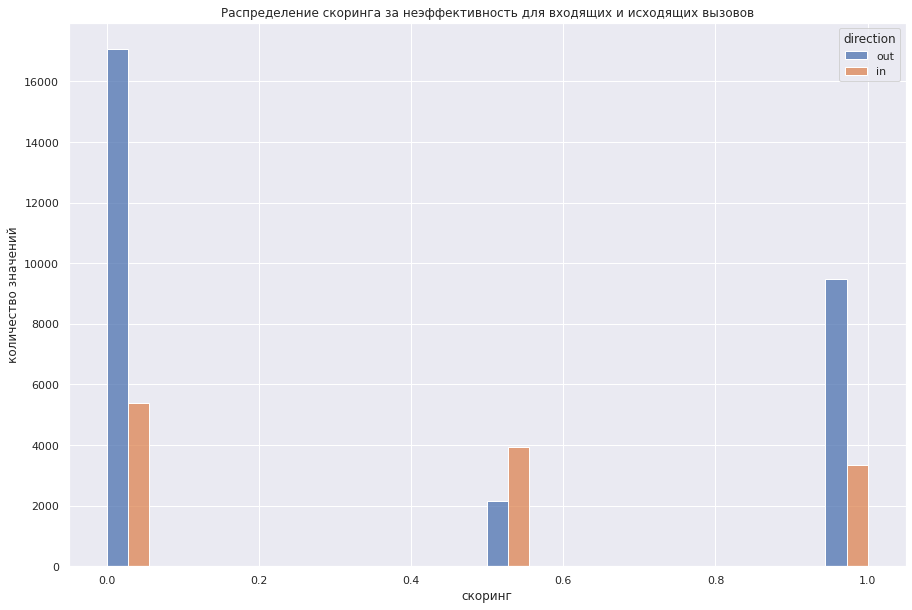

In [56]:
plt.figure(figsize=(15, 10))
ax = sns.histplot(df, x='total_score', hue='direction', kde=False, multiple='dodge')
ax.axes.set_title("Распределение скоринга за неэффективность для входящих и исходящих вызовов")
ax.set_xlabel("скоринг")
ax.set_ylabel("количество значений")
plt.show()

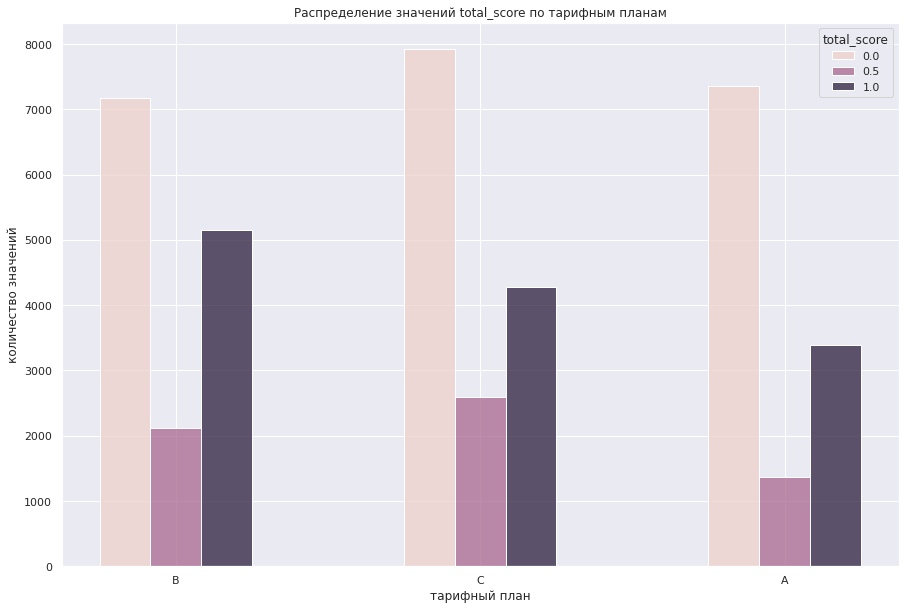

In [57]:
plt.figure(figsize=(15, 10))
ax = sns.histplot(df, x='tariff_plan', hue='total_score', shrink=0.5,  multiple="dodge")

ax.axes.set_title("Распределение значений total_score по тарифным планам")
ax.set_xlabel("тарифный план")
ax.set_ylabel("количество значений")
plt.show()

In [58]:
no_operator = df.query('total_score >= 1').reset_index(drop=True)

In [59]:
#список с не эффективными операторами и колл-центрами
nn =  pd.pivot_table(no_operator, values=['total_score'], index=['user_id', 'operator_id'])

In [60]:
nn.head(10)

total_score
user_id operator_id             
166377  880020.0             1.0
        880022.0             1.0
        880026.0             1.0
        880028.0             1.0
        881278.0             1.0
166391  882476.0             1.0
        882478.0             1.0
166392  886892.0             1.0
        891900.0             1.0
        891906.0             1.0

In [61]:
nn_t = nn.groupby('user_id').sum().sort_values(by = 'total_score' ,ascending=False)

In [62]:
nn_t.columns = ['sum_count']

In [63]:
nn_t.head(10)

,sum_count
user_id,
168187,39.0
167497,30.0
168062,27.0
168252,25.0
167626,18.0
166520,17.0
166658,17.0
166680,16.0
168091,15.0


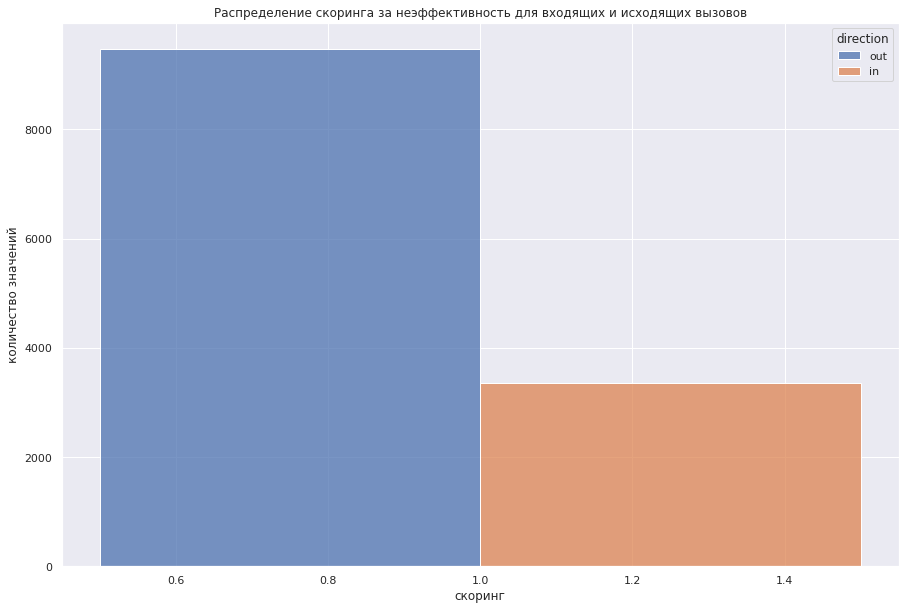

In [64]:
plt.figure(figsize=(15, 10))
ax = sns.histplot(no_operator, x='total_score', hue='direction', kde=False, multiple='dodge')
ax.axes.set_title("Распределение скоринга за неэффективность для входящих и исходящих вызовов")
ax.set_xlabel("скоринг")
ax.set_ylabel("количество значений")
plt.show()

In [65]:
print('Количество колл-центров в которых есть не эффективные операторы')
print('По всем признакам :', len(no_operator['user_id'].unique()))
print('Всего колл-центров:', len(df['user_id'].unique()))

Количество колл-центров в которых есть не эффективные операторы
По всем признакам : 256
Всего колл-центров: 287


In [66]:
print('Количество  не эффективные операторов:')
print('По всем признакам :', len(no_operator['operator_id'].unique()))
print('Всего операторов:', len(df['operator_id'].unique()))

Количество  не эффективные операторов:
По всем признакам : 883
Всего операторов: 1089


In [67]:
operator_in = no_operator[(no_operator['direction_group'] == 'in')]

In [68]:
print('Количество  не эффективные операторов специализирующихся на входящих звонках:')
print('По всем признакам :', len(operator_in['operator_id'].unique()))
print('Всего не эффективных операторов:', len(no_operator['operator_id'].unique()))
print('Доля от не эффективных:',len(operator_in['operator_id'].unique()) / len(no_operator['operator_id'].unique()))

Количество  не эффективные операторов специализирующихся на входящих звонках:
По всем признакам : 263
Всего не эффективных операторов: 883
Доля от не эффективных: 0.29784824462061155


In [69]:
operator_out = no_operator[(no_operator['direction_group'] == 'out')]

In [70]:
print('Количество  не эффективные операторов специализирующихся на исходящих звонках :')
print('По всем признакам :', len(operator_out['operator_id'].unique()))
print('Всего не эффективных операторов:', len(no_operator['operator_id'].unique()))
print('Доля от не эффективных:',len(operator_out['operator_id'].unique()) / len(no_operator['operator_id'].unique()))

Количество  не эффективные операторов специализирующихся на исходящих звонках :
По всем признакам : 620
Всего не эффективных операторов: 883
Доля от не эффективных: 0.7021517553793885


**По данной метрики мы увидели, что практически каждый оператор может быть не эффективным. Необходимо следить за всеми показателями, особенно остро это отображается на "исходящих" колл-центрах, доля не эффективных 70 %, это огромная цирфа. Им и можно призентавать наши расчёты для отслеживания эффективности.**

# Шаг 4.Проверьте статистические гипотезы.


**Проверка гипотезы о различии времени ожидания ответа на входящий звонок в зависимости от тарифного плана**  


In [71]:
#Cоздадим выборки для оценки наших гипотез
sample_01 = df.query('tariff_plan == "A"')
sample_02 = df.query('tariff_plan == "B"')
sample_03 = df.query('tariff_plan == "C"')
sample_1 = sample_01.loc[:,['avr']]
sample_2 = sample_02.loc[:,['avr']]
sample_3 = sample_03.loc[:,['avr']]


Применим Т-тест для подтверждения гипотезы о равенстве средних двух генеральных совокупностей.  
H0 - Среднее время ожидания тарифа А = В   
H1 - Среднее время ожидания тарифа А != В  
критический уровень статистической значимости = 0.05

In [72]:
alpha = 0.05  

results = st.ttest_ind(sample_1, sample_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: [0.68505168]
Не получилось отвергнуть нулевую гипотезу


H0 - Среднее время ожидания тарифа B = C   
H1 - Среднее время ожидания тарифа B != C  

In [73]:
alpha = 0.05  

results = st.ttest_ind(sample_2, sample_3)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: [8.91624624e-40]
Отвергаем нулевую гипотезу


H0 - Среднее время ожидания тарифа A = C  
H1 - Среднее время ожидания тарифа A != C

In [74]:
alpha = 0.05  

results = st.ttest_ind(sample_1, sample_3)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: [2.76507343e-40]
Отвергаем нулевую гипотезу


**Тарифный план С имеет различия с А по времени ожидания на входящий звонок**

**Проверка гипотезы о различии числа пропущенных входящих вызовов в зависимости от тарифного плана**

In [75]:
sample_a = sample_01.query('(direction == "in") and (is_missed_call == True)')['calls_count']
sample_b = sample_02.query('(direction == "in") and (is_missed_call == True)')['calls_count']
sample_c = sample_03.query('(direction == "in") and (is_missed_call == True)')['calls_count']

H0 - sample_a = sample_b  
H1 - sample_a != sample_b

In [76]:
alpha = 0.05  

results = st.ttest_ind(sample_a, sample_b)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.1693490946680971
Не получилось отвергнуть нулевую гипотезу


In [77]:
alpha = 0.05  

results = st.ttest_ind(sample_b, sample_c)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.18634029436061147
Не получилось отвергнуть нулевую гипотезу


H0 - sample_b = sample_c  
H1 - sample_b != sample_c

In [78]:
alpha = 0.05  

results = st.ttest_ind(sample_a, sample_c)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.015916083705629715
Отвергаем нулевую гипотезу


H0 - sample_a = sample_c  
H1 - sample_a != sample_c

**Тарифный план A имеет различия с С и c по числу пропропущенных входящих вызовов**

# Вывод и рекомендации


**Произвели большую и эффективную работу с данными. Ознакомились с данными, удалили дубликаты, изменили типы данных в датах. Пришел к выводу, что логически нечем заменить данные в столбце "operator_id" из имющихся в таблице,замена на не известные могла исказить работу колл-центров, удалили пропуски. После добавили новые слобцы с метриками для оценки неэффективных операторов. И добавили категаризацию колл-центров на входящие "in",изходящие "out" . Для удобства оценки и узнать для кого же будет актуальна предложение нашей оценки. Пришли к выводу данные метрики будут полезны для колл-центров специализующихся на исходящих вызовах. Т.к. их доля неэффективных операторов состовляет  70%. Не имеем информации по тарифам которые даю колл-центры, но по нашим гипотезам они так же имеют влияние для тех или иных ввидов колл-центров.** 

**Рекомендации.  
Конечно, для более эффективной оценки нам необходимо больше информации о операторах и их времени работы, но даже на этих данных с уверенностью можно сказать, что она будет полезна при оценке колл-центров и поможет им быть более продуктивными, и в будущем монетизировать работу если будут учитываться наши метрики.  
Чтобы понизить скоринг неэффективности необходимо отслеживать на ежедневной основе такие метрики как :**
  - Средние продолжительность ожидания
  - Пропущенные звонки для "принимающих"("in") колл-центров
  - мало исходящих вывозов — в случае тех колл-центров, что специализируются на обзвонах("out")

# Шаг 5. Построить дашборд и презентацию в pdf**  

In [79]:
#выгрузим наш датасет
df.to_csv('data.csv', sep='\t')

[Презентация](https://disk.yandex.ru/i/HZgcFObbiJ29Hw)

[Дашборд](https:)